In [2]:
# Importing libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import os

In [3]:
# Study data files
disney_raw_data = "disney_movies_total_gross.csv"

# Read data files
disney_df = pd.read_csv(disney_raw_data)
disney_df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [4]:
disney_df.columns = ["Movie", "Release Date", "Genre", "Rating", "Total Gross", "Inflated Gross"]
disney_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [5]:
# Making a array of genres
genres = disney_df['Genre'].unique()
genres

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [6]:
disney_df['Year']= ""
disney_df['Year'] = disney_df['Release Date'].astype(str).str[0:4]
disney_df['Month'] = disney_df['Release Date'].astype(str).str[5:7]
#disney_df['Year'] = disney_df['Year'].astype('int64')
disney_df['Inflated Gross'] = disney_df['Inflated Gross'].astype('int64')
disney_df['Million Gross'] = round(disney_df['Inflated Gross']/1000000,2)
disney_df.head(30)
#df['D'] = df['B'].astype(str).str[0]
#disney_df['Year']= disney_df("Release Date"()[0:4])

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,1078.51
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02,920.61
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,1954,12,528.28
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955,06,1236.04
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832,1959,01,21.51
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961,01,1362.87
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,1961,03,310.09


In [7]:
disney_df.count()

Movie             579
Release Date      579
Genre             562
Rating            523
Total Gross       579
Inflated Gross    579
Year              579
Month             579
Million Gross     579
dtype: int64

In [8]:
#not working how I think it should!!
disney_df['Rating'] = disney_df['Rating'].fillna('#Missing Data')
disney_df['Genre'] = disney_df['Genre'].fillna('#Missing Data')
disney_df['Rating'] = disney_df['Rating'].replace('Not Rated', '#Missing Data')
#blank_genre_df = pd.DataFrame(disney_df[disney_df['Rating'] == '0'])

#blank_genre_df
disney_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,1078.51
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02,920.61
...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,09,12.55
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,09,8.87
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,11,232.53
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016,11,246.08


In [63]:
disney_df['Year'] = disney_df['Year'].astype('int64')
disney_1970_df = pd.DataFrame(disney_df[disney_df['Year'] >= 1970])
disney_1970_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,04,255.16
16,The Boatniks,1970-07-01,Comedy,#Missing Data,18607492,101200742,1970,07,101.20
17,Bedknobs and Broomsticks,1971-10-07,Musical,#Missing Data,17871174,91305448,1971,10,91.31
18,The Apple Dumpling Gang,1975-07-01,Comedy,#Missing Data,31916500,131246872,1975,07,131.25
19,Freaky Friday,1977-01-21,Comedy,#Missing Data,25942000,98067733,1977,01,98.07
...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,09,12.55
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,09,8.87
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,11,232.53
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016,11,246.08


In [9]:
#Cleaned out the movies that grossed $0 total
disney_gt_df = pd.DataFrame(disney_df[disney_df['Million Gross'] > 0])
disney_gt_df.head(10)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,1078.51
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02,920.61
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,#Missing Data,28200000,528279994,1954,12,528.28
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955,06,1236.04
7,Sleeping Beauty,1959-01-29,Drama,#Missing Data,9464608,21505832,1959,01,21.51
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961,01,1362.87
9,The Absent Minded Professor,1961-03-16,Comedy,#Missing Data,25381407,310094574,1961,03,310.09


In [10]:
#Data that is blank in Rating
disney_test_df=  pd.DataFrame(disney_df[disney_df.Rating == 0])
disney_test_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross


In [11]:
disney_test_df.count()

Movie             0
Release Date      0
Genre             0
Rating            0
Total Gross       0
Inflated Gross    0
Year              0
Month             0
Million Gross     0
dtype: int64

In [12]:
test_df = pd.DataFrame(disney_df.groupby(['Genre','Rating']))
#test_df= disney_df.groupby(['Genre','Rating']).count()
type(test_df)   #.head()

pandas.core.frame.DataFrame

In [13]:
test_df = disney_df.groupby(['Genre','Rating','Movie']).count()
#test_df= disney_df.groupby(['Genre','Rating']).count()
#type(test_df)   #.head()
test_df

Release Date  \
Genre         Rating        Movie                                      
#Missing Data #Missing Data Frank McKlusky C.I.                    1   
                            Herbie Goes to Monte Carlo             1   
                            Midnight Madness                       1   
                            The Black Hole                         1   
                            The Devil and Max Devlin               1   
...                                                              ...   
Western       PG-13         Shanghai Noon                          1   
                            The Alamo                              1   
                            The Lone Ranger                        1   
              R             Open Range                             1   
                            Tombstone                              1   

                                                        Total Gross  \
Genre         Rating        Movie                                     
#Missing Data #Missing Data Frank McKlusky C.I.                   1   
                            Herbie Goes to Monte Carlo            1   
                            Midnight Madness                      1   
                            The Black Hole                        1   
                            The Devil and Max Devlin              1   
...                                                             ...   
Western       PG-13         Shanghai Noon                         1   
                            The Alamo                             1   
                            The Lone Ranger                       1   
              R             Open Range                            1   
                            Tombstone                             1   

                                                        Inflated Gross  Year  \
Genre         Rating        Movie                                              
#Missing Data #Missing Data Frank McKlusky C.I.                      1     1   
                            Herbie Goes to Monte Carlo               1     1   
                            Midnight Madness                         1     1   
                            The Black Hole                           1     1   
                            The Devil and Max Devlin                 1     1   
...                                                                ...   ...   
Western       PG-13         Shanghai Noon                            1     1   
                            The Alamo                                1     1   
                            The Lone Ranger                          1     1   
              R             Open Range                               1     1   
                            Tombstone                                1     1   

                                                        Month  Million Gross  
Genre         Rating        Movie                                             
#Missing Data #Missing Data Frank McKlusky C.I.             1              1  
                            Herbie Goes to Monte Carlo      1              1  
                            Midnight Madness                1              1  
                            The Black Hole                  1              1  
                            The Devil and Max Devlin        1              1  
...                                                       ...            ...  
Western       PG-13         Shanghai Noon                   1              1  
                            The Alamo                       1              1  
                            The Lone Ranger                 1              1  
              R             Open Range                      1              1  
                            Tombstone                       1              1  

[577 rows x 6 columns]

In [14]:
#Not working like I think it should


#index = pd.MultiIndex.from_frame(disney_df, names=["Genre", "Rating"])

In [15]:
disney_rating_df=  disney_df[['Rating','Million Gross']].copy() 
disney_rating_df

,Rating,Million Gross
0,G,5228.95
1,G,2188.23
2,G,2187.09
3,G,1078.51
4,G,920.61
...,...,...
574,PG-13,12.55
575,PG,8.87
576,PG-13,232.53
577,PG,246.08


In [16]:
disney_genre_df=  disney_df[['Genre','Million Gross']].copy() 
disney_genre_df

,Genre,Million Gross
0,Musical,5228.95
1,Adventure,2188.23
2,Musical,2187.09
3,Adventure,1078.51
4,Drama,920.61
...,...,...
574,Drama,12.55
575,Drama,8.87
576,Adventure,232.53
577,Adventure,246.08


In [17]:
#Seperated to highlight Musicals
disney_musical_df=  pd.DataFrame(disney_df[disney_df.Genre == "Musical"])
disney_musical_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
10,Babes in Toyland,1961-12-14,Musical,G,10218316,124841160,1961,12,124.84
13,The Jungle Book,1967-10-18,Musical,#Missing Data,141843000,789612346,1967,10,789.61
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,04,255.16
17,Bedknobs and Broomsticks,1971-10-07,Musical,#Missing Data,17871174,91305448,1971,10,91.31
114,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667,1991,11,363.02
142,Swing Kids,1993-03-05,Musical,PG-13,5632086,11468231,1993,03,11.47
161,The Nightmare Before Christmas,1993-10-13,Musical,PG,50408318,100026637,1993,10,100.03
254,Evita,1996-12-25,Musical,PG,50047179,92077628,1996,12,92.08


In [18]:
#Replace NaN and Not Rated with current information from the web
#need to review why this isn't replacing 'missing data'
disney_musical_df['Rating'] = disney_musical_df['Rating'].replace('Not Rated', 'G')
disney_musical_df['Rating'] = disney_musical_df['Rating'].fillna(0)
disney_musical_df['Rating'] = disney_musical_df['Rating'].replace('Missing Data', 'G')
disney_musical_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
10,Babes in Toyland,1961-12-14,Musical,G,10218316,124841160,1961,12,124.84
13,The Jungle Book,1967-10-18,Musical,#Missing Data,141843000,789612346,1967,10,789.61
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,04,255.16
17,Bedknobs and Broomsticks,1971-10-07,Musical,#Missing Data,17871174,91305448,1971,10,91.31
114,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667,1991,11,363.02
142,Swing Kids,1993-03-05,Musical,PG-13,5632086,11468231,1993,03,11.47
161,The Nightmare Before Christmas,1993-10-13,Musical,PG,50408318,100026637,1993,10,100.03
254,Evita,1996-12-25,Musical,PG,50047179,92077628,1996,12,92.08


In [19]:
# Group musical genre with average millions inflated gross
disney_musical_rating_df = pd.DataFrame(disney_musical_df.groupby('Rating').mean()['Million Gross'])
#avg_rating_clean['Inflated Gross'] = avg_rating_clean['Inflated Gross'].astype('int64')

#avg_rating_clean = round((avg_rating),1)
disney_musical_rating_df

,Million Gross
Rating,
#Missing Data,440.460000
G,934.604444
PG,88.435000
PG-13,11.470000


Text(0, 0.5, 'Inflated Gross (Millions)')

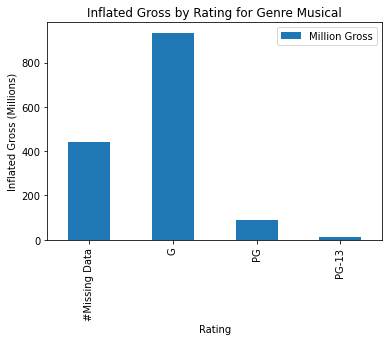

In [20]:
#Bar graph Musical -Genre vs millions Gross
disney_musical_rating_df.plot.bar()
plt.title('Inflated Gross by Rating for Genre Musical')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.ylabel('Inflated Gross (Millions)')

In [21]:
disney_count = pd.DataFrame(disney_df.groupby('Genre').count()['Movie'])
disney_count


,Movie
Genre,
#Missing Data,17
Action,40
Adventure,129
Black Comedy,3
Comedy,182
Concert/Performance,2
Documentary,16
Drama,114
Horror,6


In [55]:
# Group genre with average inflated gross
avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Million Gross'])
#avg_gross_per_genre['Inflated Gross'] = avg_gross_per_genre['Inflated Gross'].astype('int64')

            #avg_gross_clean = round((avg_gross_per_genre),1)   
            #avg_gross_clean
#avg_gross_per_genre['Million Gross'] = avg_gross_per_genre['Inflated Gross']/1000000
avg_gross_per_genre

,Million Gross
Genre,
#Missing Data,21.624706
Action,137.473500
Adventure,190.397132
Black Comedy,52.243333
Comedy,84.667692
Concert/Performance,57.410000
Documentary,12.718125
Drama,71.892807
Horror,23.415000


Use below plot for genre slides

Text(0, 0.5, 'Average Inflated Gross (1e8)')

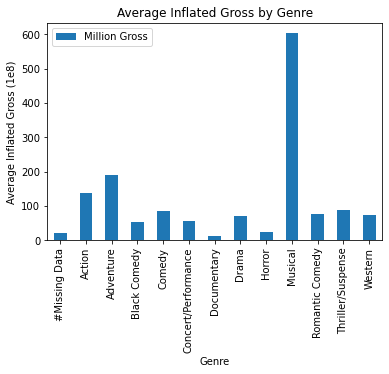

In [56]:
#Bar graph Genre vs Inflated Gross
avg_gross_per_genre.plot.bar()
plt.title('Average Inflated Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (1e8)')

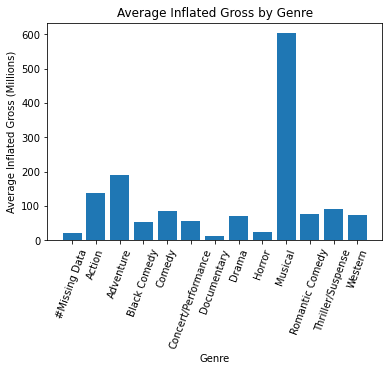

In [24]:
plt.bar(avg_gross_per_genre.index,avg_gross_per_genre['Million Gross'])
#x_axis = np.arange(len(avg_gross_per_genre.index))  For working with the tick marks
#tick_locations = [value +1  for value in x_axis]

plt.xticks(rotation=70)

plt.title("Average Inflated Gross by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Inflated Gross (Millions)")


plt.show()

In [25]:
# Count amount of movies per rating
avg_gross_per_rating = pd.DataFrame(disney_df.groupby('Rating').count()['Movie'])
avg_gross_per_rating.columns = ['Total Movies']
avg_gross_per_rating

,Total Movies
Rating,
#Missing Data,59
G,86
PG,187
PG-13,145
R,102


In [58]:
# Group rating with average inflated gross
avg_rating_clean = pd.DataFrame(disney_df.groupby('Rating').mean()['Million Gross'])
#avg_rating_clean['Inflated Gross'] = avg_rating_clean['Inflated Gross'].astype('int64')
avg_rating_clean = avg_rating_clean.rename(columns={'Million Gross': 'Avg Inflated Gross (USD)'})
#avg_rating_clean = round((avg_rating),1)
avg_rating_clean

,Avg Inflated Gross (USD)
Rating,
#Missing Data,70.475763
G,291.261047
PG,101.541497
PG-13,102.948138
R,55.305686


In [60]:
# Group rating with average inflated gross
avg_rating_clean = pd.DataFrame(disney_df.groupby('Rating').mean()['Million Gross'])
avg_rating_clean['Million Gross'] = avg_rating_clean['Million Gross'].astype('int64')
avg_rating_clean = avg_rating_clean.rename(columns={'Million Gross': 'Count of Movies'})
#avg_rating_clean = round((avg_rating),1)
avg_rating_clean

,Count of Movies
Rating,
#Missing Data,70
G,291
PG,101
PG-13,102
R,55


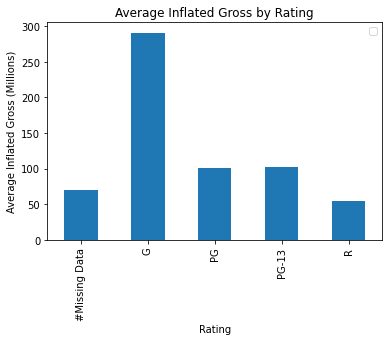

In [62]:
#Bar Graph   Rating vs Inflated Gross
avg_rating_clean.plot.bar()
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')
plt.legend([])

In [64]:
#1970 List 
year_1970_df = pd.DataFrame(disney_1970_df.groupby('Year').mean()['Million Gross'])
year_1970_df

,Million Gross
Year,
1970,178.180000
1971,91.310000
1975,131.250000
1977,90.915000
1979,120.380000
1980,21.780000
1981,45.410000
1982,36.906667
1983,25.137500


In [29]:


year_df = pd.DataFrame(disney_df.groupby('Year').mean()['Million Gross'])

#year_df['Inflated Gross'] = year_df['Inflated Gross'].astype('int64')

#year_mean = round((year),1)
year_df

#avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Inflated Gross'])
#avg_gross_clean = round((avg_gross_per_genre),1)
#avg_gross_clean

,Million Gross
Year,
1937,5228.950000
1940,2187.660000
1946,1078.510000
1950,920.610000
1954,528.280000
1955,1236.040000
1959,21.510000
1961,599.266667
1962,109.580000


In [30]:
year_df.count()

Million Gross    54
dtype: int64

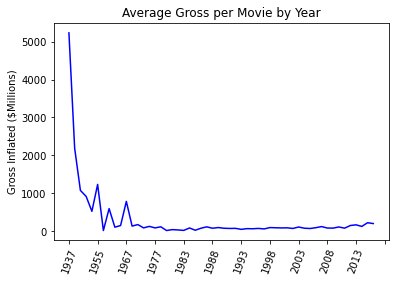

In [31]:
## Maybe we can do this by decade as this is really hard to read###

years = year_df.index
gross_mean = year_df['Million Gross'].values

year_line= plt.plot(years, gross_mean, color="blue",label="Mean over Time")
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    bottom=False)      # ticks along the bottom edge are off



plt.title("Average Gross per Movie by Year")
#plt.xlabel("Years")

plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55])

plt.xticks(rotation=70)
plt.ylabel("Gross Inflated ($Millions)")
plt.show()

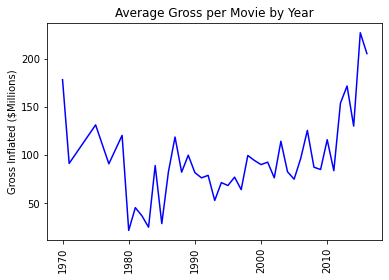

In [68]:
## Maybe we can do this by decade as this is really hard to read###

years = year_1970_df.index
gross_mean = year_1970_df['Million Gross'].values

year_line= plt.plot(years, gross_mean, color="blue",label="Mean over Time")
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    bottom=False)      # ticks along the bottom edge are off



plt.title("Average Gross per Movie by Year")
#plt.xlabel("Years")

#plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55])

plt.xticks(rotation=90)
plt.ylabel("Gross Inflated ($Millions)")
plt.show()

In [32]:
#Breaking down data per Month to see if there is higher success in specific months or seasons
month_df = pd.DataFrame(disney_df.groupby('Month').mean()['Million Gross'])
month_df = month_df.rename(columns={'Million Gross': 'Average Gross per Movie'})
month_df

,Average Gross per Movie
Month,
01,81.698421
02,118.255682
03,74.344262
04,50.992800
05,152.325122
06,191.966200
07,111.667955
08,75.042041
09,35.188605


([<matplotlib.axis.XTick at 0x1907f0bca90>,
 [Text(1, 0, 'January'),
  Text(2, 0, 'February'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November'),
  Text(12, 0, 'December')])

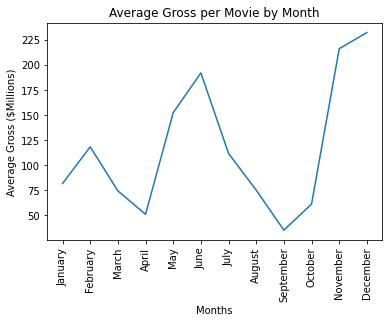

In [33]:
# Plot results on a line plot
month_df.reset_index()
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avg_gross = [81.698421, 118.255682, 74.344262, 50.992800, 152.325122, 191.966200, 111.667955,
            75.042041, 35.188605, 61.252600, 216.080169, 232.249000]
plt.plot(month, avg_gross)
plt.title('Average Gross per Movie by Month')
plt.xlabel('Months')
plt.ylabel('Average Gross ($Millions)')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May',
                                                     'June', 'July', 'August', 'September', 'October', 'November',
                                                     'December'], rotation=90)


In [34]:
# Finding Total # of Movies released per Month
month_count = pd.DataFrame(disney_df.groupby('Month').count()['Movie'])
month_count = month_count.rename(columns={'Movie': '# of Movies'})
month_count

,# of Movies
Month,
01,38
02,44
03,61
04,50
05,41
06,50
07,44
08,49
09,43


([<matplotlib.axis.XTick at 0x1907f0457f0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

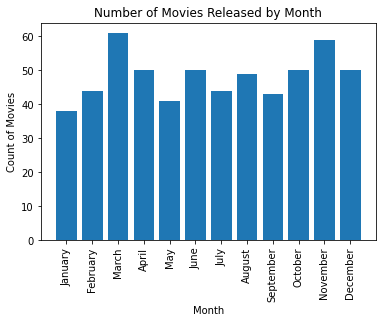

In [35]:
# Plot Results on Bar plot
x_axis = np.arange(len(month_count))
plt.bar(x_axis, month_count['# of Movies'])
plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Count of Movies')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May',
                                                     'June', 'July', 'August', 'September', 'October', 'November',
                                                     'December'], rotation=90)



In [36]:
#Drill down data to show last 10 years and make new data frame
disney_df['Year'] = disney_df['Year'].astype('int64')
disney_year_2005_df = pd.DataFrame(disney_df[disney_df['Year'] > 2005])
disney_year_2005_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
431,Glory Road,2006-01-13,Drama,PG,42647449,54888236,2006,01,54.89
432,Annapolis,2006-01-27,Drama,PG-13,17127992,22044113,2006,01,22.04
433,Roving Mars,2006-01-27,Documentary,G,10407978,12948025,2006,01,12.95
434,Eight Below,2006-02-17,Adventure,PG,81612565,105037235,2006,02,105.04
435,The Shaggy Dog,2006-03-10,Comedy,PG,61123569,78667428,2006,03,78.67
...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,09,12.55
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,09,8.87
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,11,232.53
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016,11,246.08


In [37]:
# Use new Data Frame and group rating with average inflated gross
rating_2005_df = pd.DataFrame(disney_year_2005_df.groupby('Rating').mean()['Million Gross'])
rating_2005_df

,Million Gross
Rating,
G,102.792500
PG,123.973182
PG-13,171.340851
R,17.784286


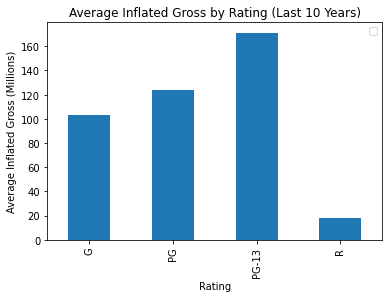

In [38]:
#Bar Graph   Rating vs Inflated Gross (FOR LAST 10 YEARS)
rating_2005_df.plot.bar()
plt.title('Average Inflated Gross by Rating (Last 10 Years)')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')
plt.legend([])

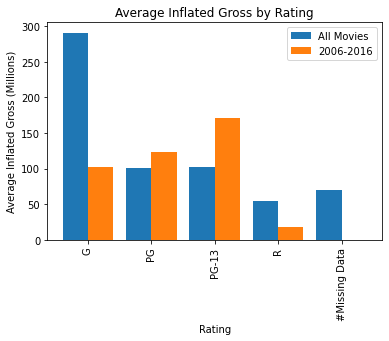

In [46]:
#Compare the two rating bar plots (Overall and Last 10 Years)
x = ['G', 'PG', 'PG-13', 'R', '#Missing Data']  
y1 = [291, 101, 102, 55, 70]
y2 = [102.792500, 123.973182, 171.340851, 17.784286, 0]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label='All Movies')
plt.bar(x_axis + 0.2, y2, 0.4, label='Last 10 Years')

plt.xticks(x_axis, x, rotation=90)

plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')

plt.legend(["All Movies", "2006-2016"])



In [47]:
# Use new Data Frame and group genre with average inflated gross
genre_2005_df = pd.DataFrame(disney_year_2005_df.groupby('Genre').mean()['Million Gross'])
genre_2005_df

,Million Gross
Genre,
Action,249.672727
Adventure,201.467273
Comedy,96.835455
Concert/Performance,57.410000
Documentary,13.452500
Drama,61.362069
Horror,24.580000
Musical,89.313333
Romantic Comedy,89.893333


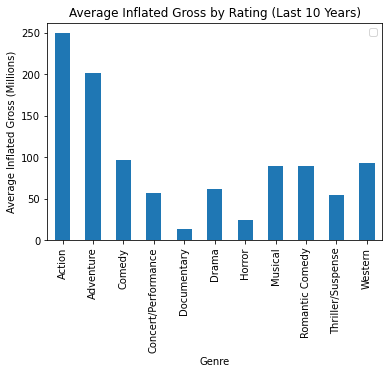

In [48]:
#Bar Graph   Genre vs Inflated Gross (FOR LAST 10 YEARS)
genre_2005_df.plot.bar()
plt.title('Average Inflated Gross by Rating (Last 10 Years)')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (Millions)')
plt.legend([])

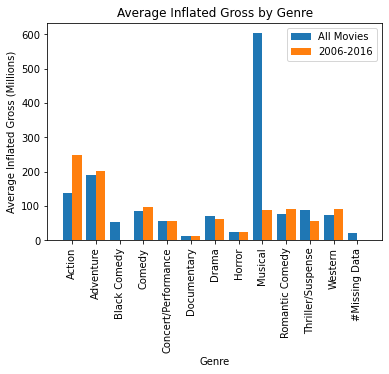

In [49]:
#Compare the two rating bar plots (Overall and Last 10 Years)
x = ['Action', 'Adventure', 'Black Comedy', 'Comedy', 'Concert/Performance', 'Documentary', 'Drama', 'Horror',
    'Musical', 'Romantic Comedy', 'Thriller/Suspense', 'Western', '#Missing Data']  

y1 = [137.47, 190.39, 52.243, 84.66, 57.41, 12.71, 71.89, 23.41, 603.59, 77.77, 89.65, 73.81, 21.62]
y2 = [249.67, 201.46, 0, 96.83, 57.41, 13.45, 61.36, 24.58, 89.31, 89.89, 55.12, 92.60, 0]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label='All Movies')
plt.bar(x_axis + 0.2, y2, 0.4, label='Last 10 Years')

plt.xticks(x_axis, x, rotation=90)

plt.title('Average Inflated Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (Millions)')

plt.legend(["All Movies", "2006-2016"])


In [50]:
#pd.DataFrame(disney_genre_df)
type(disney_genre_df)

pandas.core.frame.DataFrame

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, '#Missing Data'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Black Comedy'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Concert/Performance'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Horror'),
  Text(10, 0, 'Musical'),
  Text(11, 0, 'Romantic Comedy'),
  Text(12, 0, 'Thriller/Suspense'),
  Text(13, 0, 'Western')])

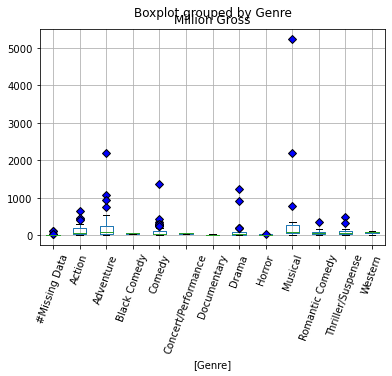

In [51]:
#trying to make a boxplot but I don't think it will work as the data is soooo far spreadout

blue_diamond = dict(markerfacecolor='b', marker='D')

disney_genre_df.boxplot(by='Genre',flierprops=blue_diamond)
plt.xticks(rotation=70)

#plt.show()

In [52]:
# Make new DataFrame showing Top 10 grossing movies
top_movies = disney_df.sort_values('Million Gross', ascending=False)
top_movies.head(10)

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Month,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,5228.95
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02,2188.23
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,2187.09
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961,01,1362.87
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955,06,1236.04
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,1078.51
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015,12,936.66
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02,920.61
13,The Jungle Book,1967-10-18,Musical,#Missing Data,141843000,789612346,1967,10,789.61
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898,1994,06,761.64
